In [16]:
install.packages('palmerpenguins')
install.packages('here')
install.packages('skimr')
install.packages('janitor')
install.packages('Tmisc')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘snakecase’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library('palmerpenguins')
library('tidyverse')
library('lubridate')
library('here')
#library('skimr')
#library('janitor')
library('Tmisc')

In [11]:
data = penguins
head(data)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [18]:
data %>%
    arrange(bill_length_mm)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Adelie,Dream,32.1,15.5,188,3050,female,2009
Adelie,Dream,33.1,16.1,178,2900,female,2008
Adelie,Torgersen,33.5,19.0,190,3600,female,2008
Adelie,Dream,34.0,17.1,185,3400,female,2008
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007
Adelie,Torgersen,34.4,18.4,184,3325,female,2007
Adelie,Biscoe,34.5,18.1,187,2900,female,2008
Adelie,Torgersen,34.6,21.1,198,4400,male,2007
Adelie,Torgersen,34.6,17.2,189,3200,female,2008
Adelie,Biscoe,35.0,17.9,190,3450,female,2008


In [20]:
sort_des <- data %>%
    arrange(-bill_length_mm)

In [23]:
head(sort_des)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Gentoo,Biscoe,59.6,17.0,230,6050,male,2007
Chinstrap,Dream,58.0,17.8,181,3700,female,2007
Gentoo,Biscoe,55.9,17.0,228,5600,male,2009
Chinstrap,Dream,55.8,19.8,207,4000,male,2009
Gentoo,Biscoe,55.1,16.0,230,5850,male,2009
Gentoo,Biscoe,54.3,15.7,231,5650,male,2008


In [26]:
pen_group <- data %>% group_by(island) %>%
    drop_na() %>%
    summarize(mean_bill_length=mean(bill_length_mm))


In [27]:
pen_group

island,mean_bill_length
Biscoe,45.24847
Dream,44.22195
Torgersen,39.03830


In [28]:
pen_group <- data %>% group_by(species, island,) %>%
    drop_na() %>%
    summarize(mean_bill_length=max(bill_length_mm), mean_bill_lenghth_min = min(bill_length_mm))

In [29]:
pen_group

species,island,mean_bill_length,mean_bill_lenghth_min
Adelie,Biscoe,45.6,34.5
Adelie,Dream,44.1,32.1
Adelie,Torgersen,46.0,33.5
Chinstrap,Biscoe,-Inf,Inf
Chinstrap,Dream,58.0,40.9
Chinstrap,Torgersen,-Inf,Inf
Gentoo,Biscoe,59.6,40.9
Gentoo,Dream,-Inf,Inf
Gentoo,Torgersen,-Inf,Inf


In [30]:
filt <- data %>%
    filter(species=='Adelie')

In [32]:
head(filt)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [33]:
id <- c(1:10)

name <- c("Hasan Moni", "Rana Mubarak", "Tausif Tamim", "Nadira Akter", 
          "Misti Sharmin", "Abdur Rahim", "Great Omar", "Julkar Nain",
          "Moni Nomi", "Nomita Hasan")

job_title <- c("Enginner", "Doctor", "Business", "Banking", "Teacher", "Business",
              "Powerful_person", "King", "engineer", "Doctor")

employee <- data.frame(id, name, job_title)
employee

id,name,job_title
1,Hasan Moni,Enginner
2,Rana Mubarak,Doctor
3,Tausif Tamim,Business
4,Nadira Akter,Banking
5,Misti Sharmin,Teacher
6,Abdur Rahim,Business
7,Great Omar,Powerful_person
8,Julkar Nain,King
9,Moni Nomi,engineer
10,Nomita Hasan,Doctor


In [35]:
name_sep <- separate(employee, name, into=c('first_name', 'last_name'), sep=' ')
name_sep

id,first_name,last_name,job_title
1,Hasan,Moni,Enginner
2,Rana,Mubarak,Doctor
3,Tausif,Tamim,Business
4,Nadira,Akter,Banking
5,Misti,Sharmin,Teacher
6,Abdur,Rahim,Business
7,Great,Omar,Powerful_person
8,Julkar,Nain,King
9,Moni,Nomi,engineer
10,Nomita,Hasan,Doctor


In [37]:
name_unit <- unite(name_sep, "full_name", first_name, last_name, sep=" ")
name_unit

id,full_name,job_title
1,Hasan Moni,Enginner
2,Rana Mubarak,Doctor
3,Tausif Tamim,Business
4,Nadira Akter,Banking
5,Misti Sharmin,Teacher
6,Abdur Rahim,Business
7,Great Omar,Powerful_person
8,Julkar Nain,King
9,Moni Nomi,engineer
10,Nomita Hasan,Doctor


In [38]:
head(data)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [41]:
mut <- data %>%
    mutate(body_mass_kg=body_mass_g/ 1000, flipper_length_mm2=flipper_length_mm/1000)
head(mut)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,flipper_length_mm2
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,3.75,0.181
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,3.80,0.186
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,3.25,0.195
Adelie,Torgersen,NA,NA,NA,NA,NA,2007,NA,NA
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,3.45,0.193
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,3.65,0.190


In [46]:
head(quartet)

set,x,y
I,10,8.04
I,8,6.95
I,13,7.58
I,9,8.81
I,11,8.33
I,14,9.96


In [47]:
quartet %>%
    group_by(set) %>%
    summarize(mean(x), sd(x), mean(y), sd(y), cor(x,y))

set,mean(x),sd(x),mean(y),sd(y),"cor(x, y)"
I,9,3.316625,7.500909,2.031568,0.8164205
II,9,3.316625,7.500909,2.031657,0.8162365
III,9,3.316625,7.500000,2.030424,0.8162867
IV,9,3.316625,7.500909,2.030579,0.8165214


In [48]:
head(data)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Warning message:
“Removed 2 rows containing missing values (geom_point).”

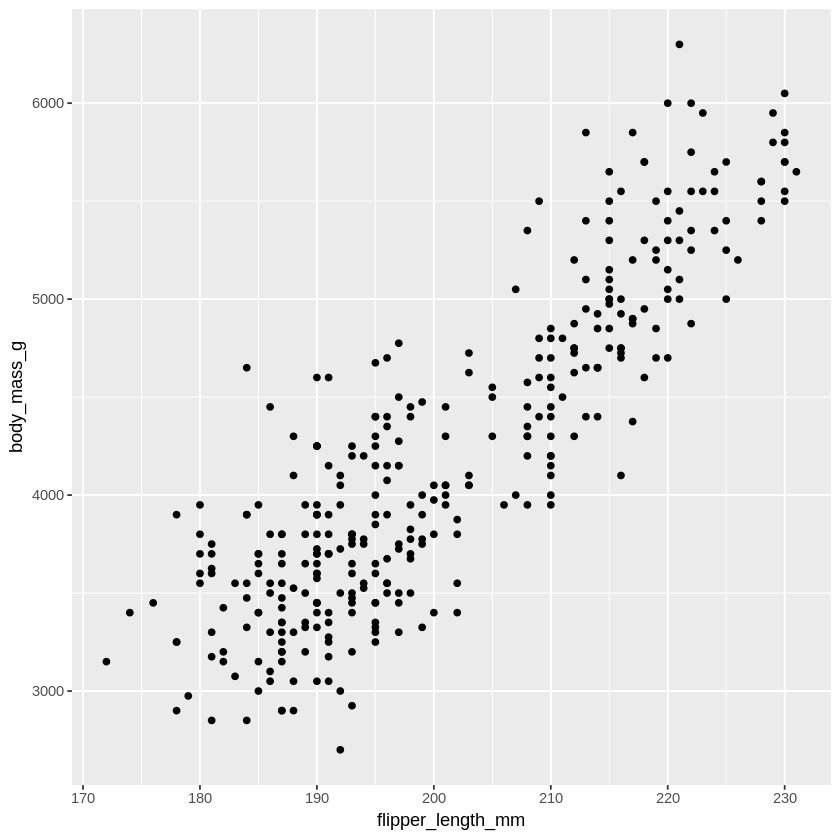

In [49]:
gg

Warning message:
“Removed 2 rows containing missing values (geom_point).”

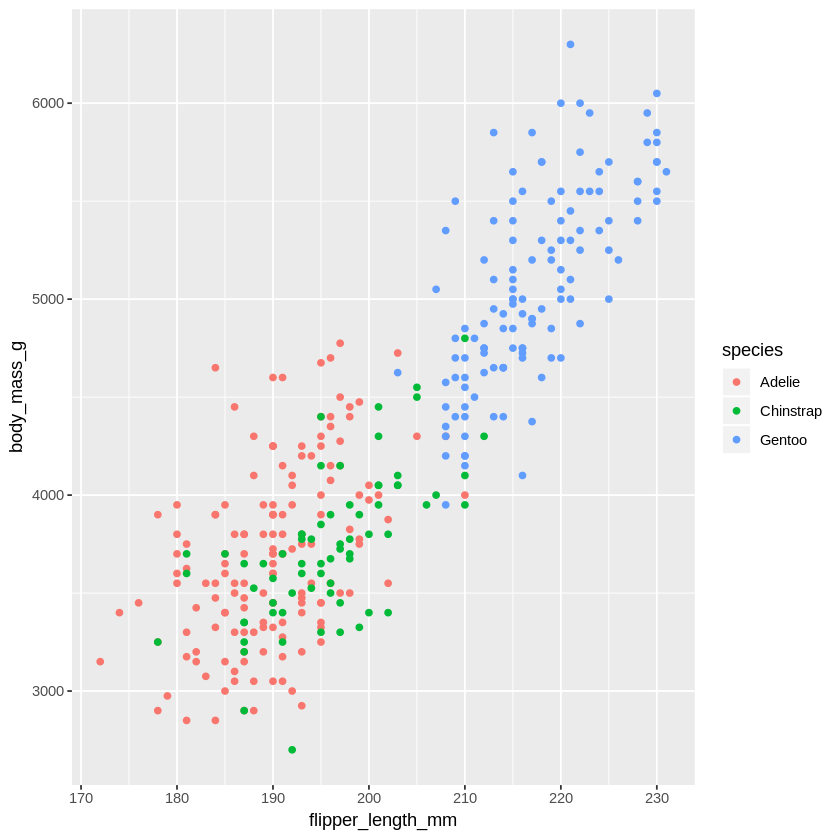

In [51]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species))

Warning message:
“Removed 2 rows containing missing values (geom_point).”

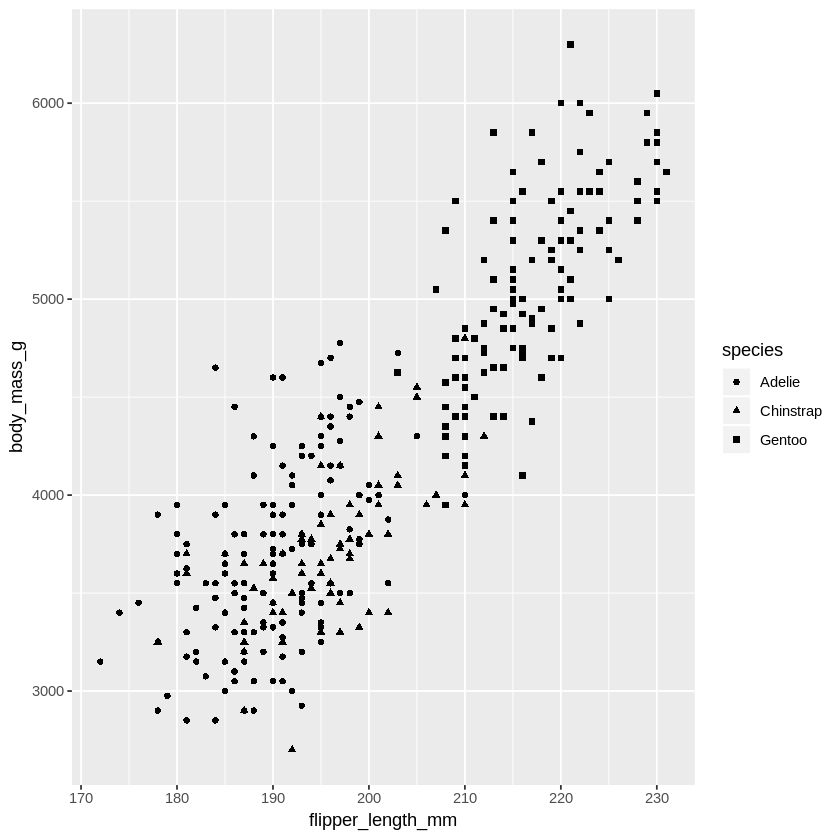

In [52]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, shape=species))

Warning message:
“Removed 2 rows containing missing values (geom_point).”

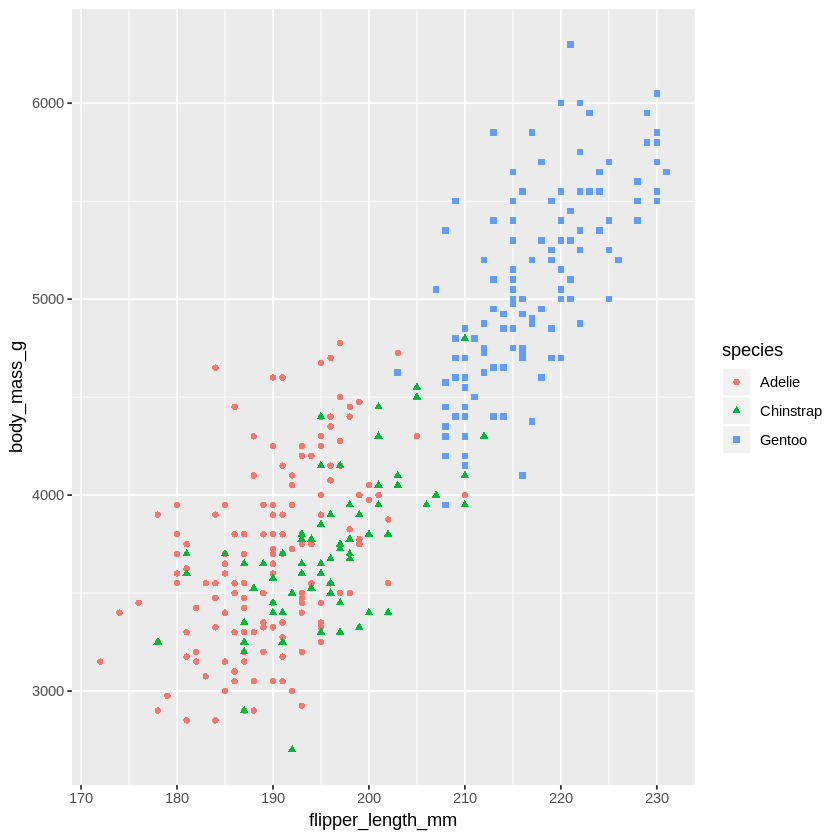

In [53]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, shape=species, color=species))

Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Removed 2 rows containing missing values (geom_point).”

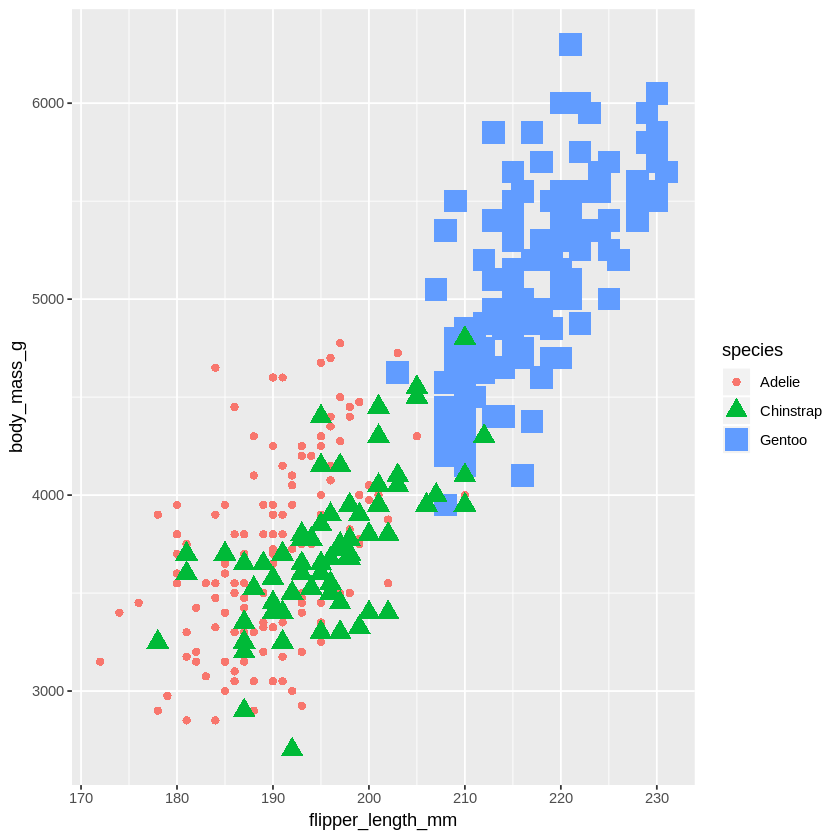

In [54]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, shape=species, color=species, size=species))

Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Removed 2 rows containing missing values (geom_point).”

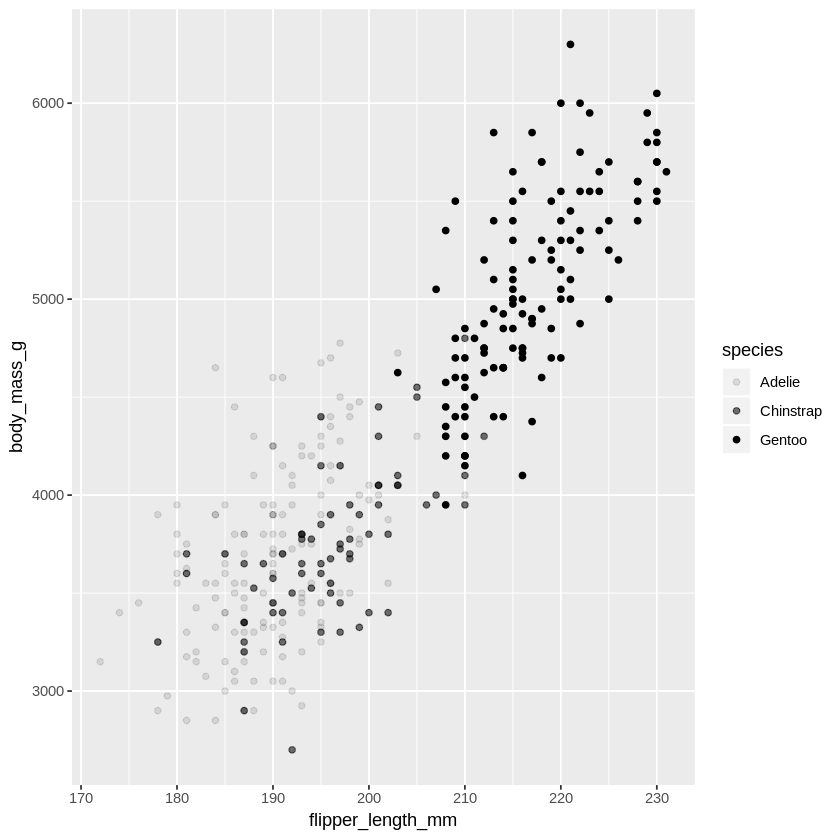

In [55]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, alpha=species))

Warning message:
“Removed 2 rows containing missing values (geom_point).”

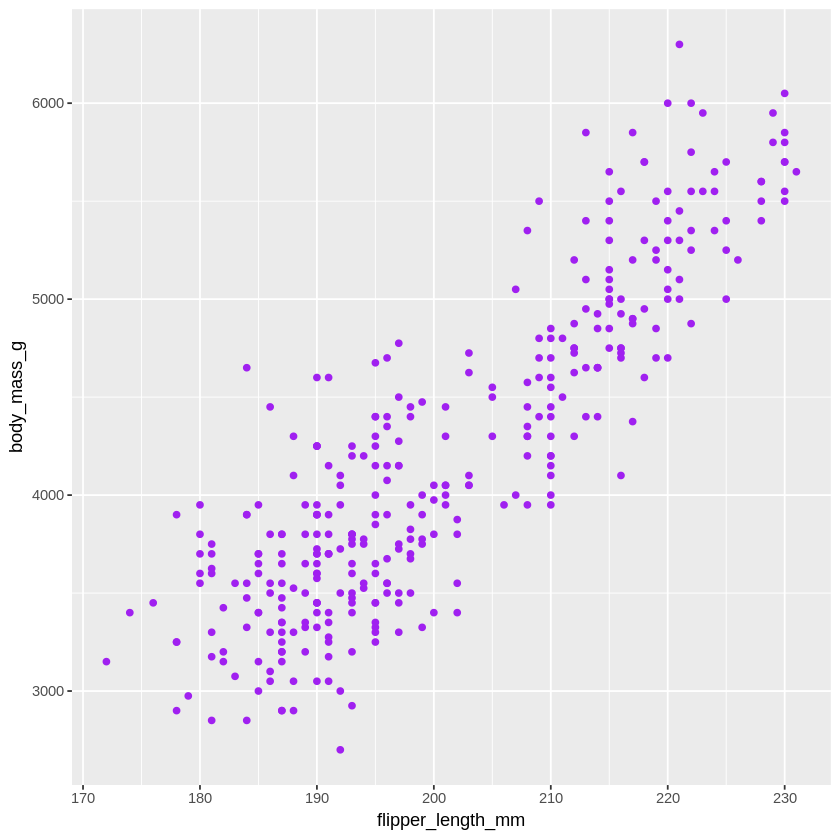

In [56]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g), color='purple')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”

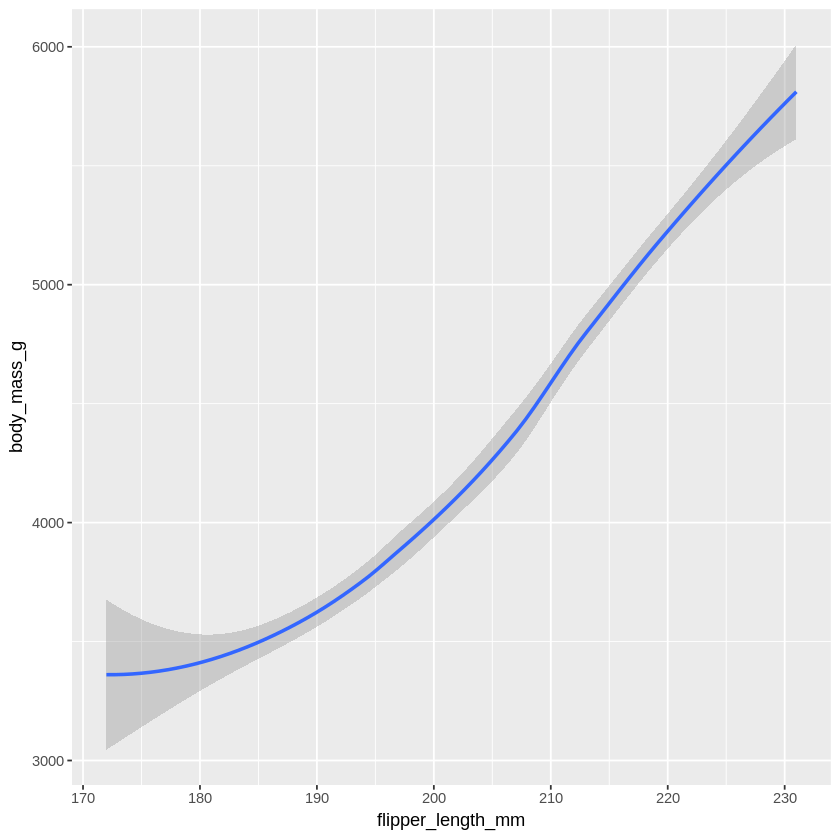

In [57]:
ggplot(data=data) +
    geom_smooth(mapping=aes(x=flipper_length_mm, y=body_mass_g))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

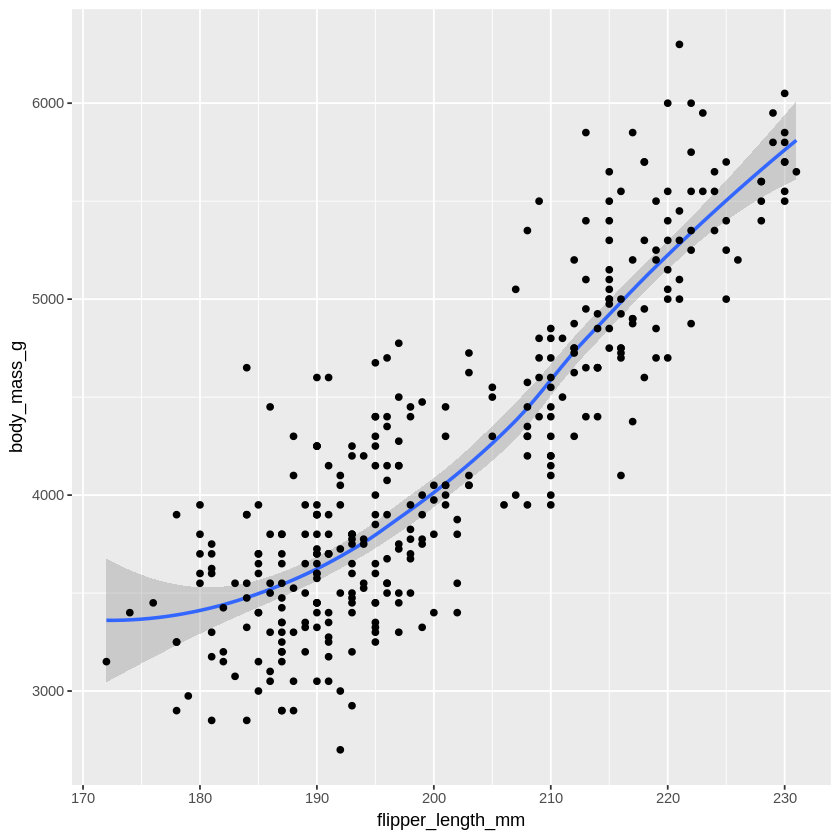

In [58]:
ggplot(data=data) +
    geom_smooth(mapping=aes(x=flipper_length_mm, y=body_mass_g)) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g)) 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”

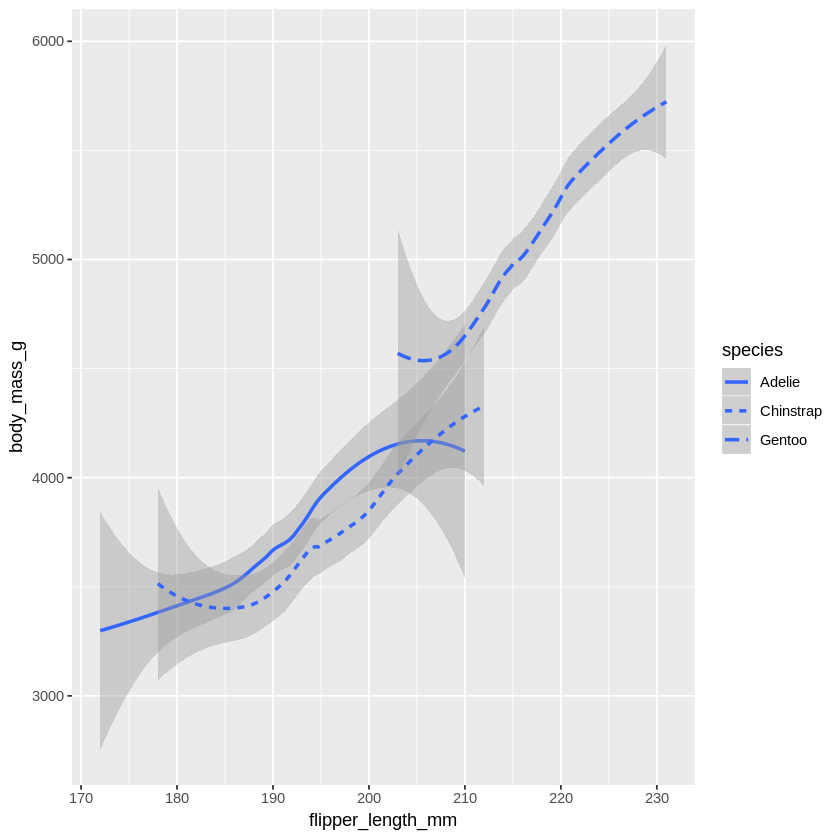

In [59]:
ggplot(data=data) +
    geom_smooth(mapping=aes(x=flipper_length_mm, y=body_mass_g, linetype=species))

Warning message:
“Removed 2 rows containing missing values (geom_point).”

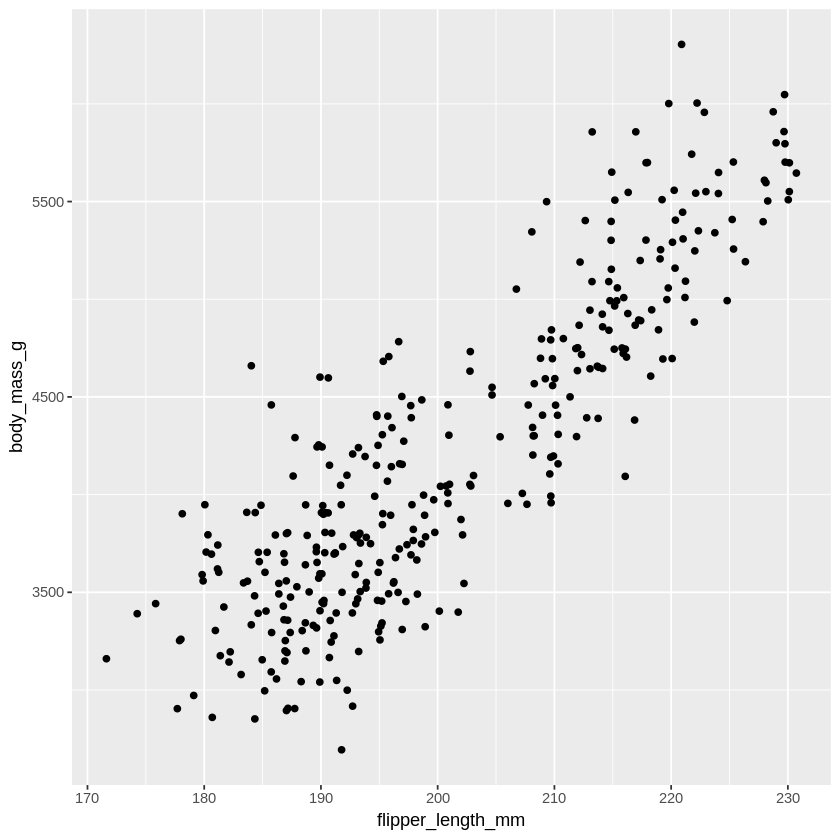

In [60]:
ggplot(data=data) +
    geom_jitter(mapping=aes(x=flipper_length_mm, y=body_mass_g))

Warning message:
“Removed 2 rows containing missing values (geom_point).”

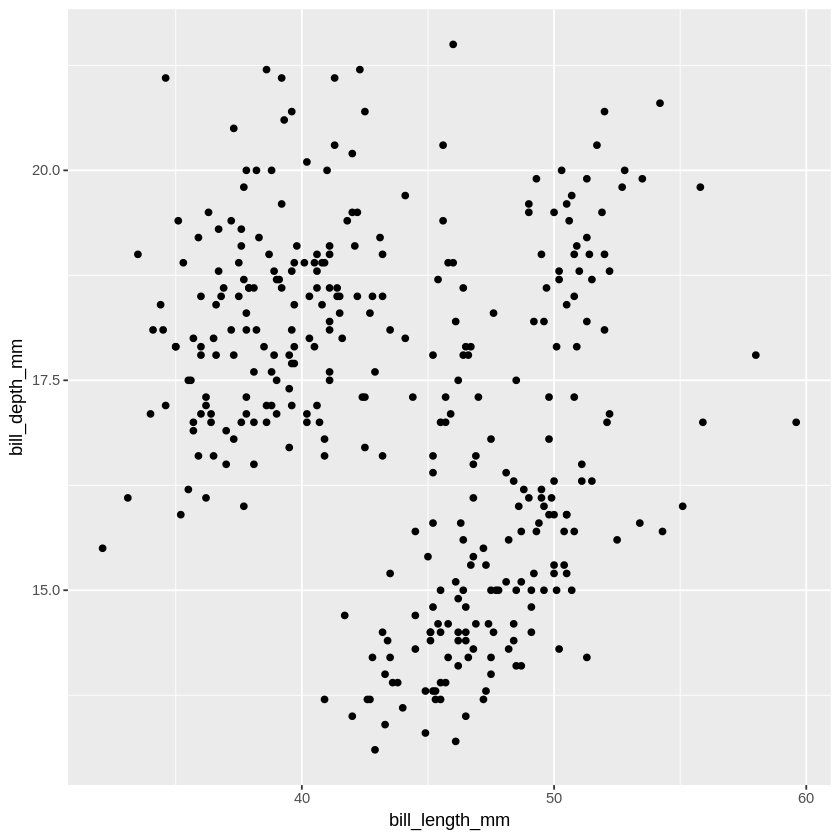

In [50]:
ggplot(data=data) +
    geom_point(mapping=aes(x=bill_length_mm, y=bill_depth_mm))

In [64]:
data = diamonds
head(data)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


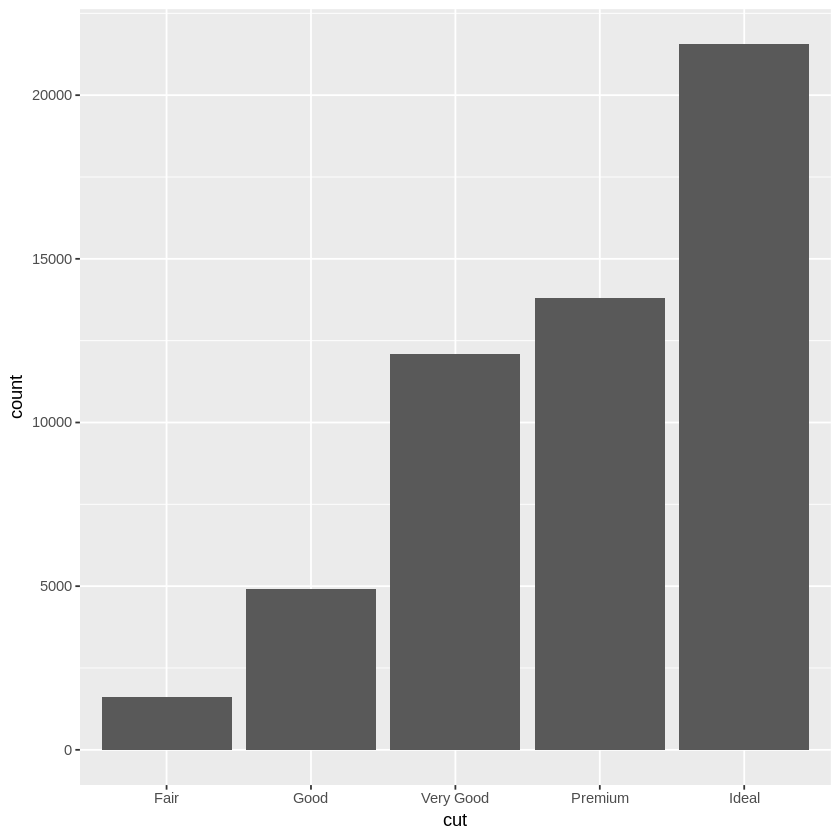

In [65]:
ggplot(data=data) +
    geom_bar(mapping=aes(x=cut))

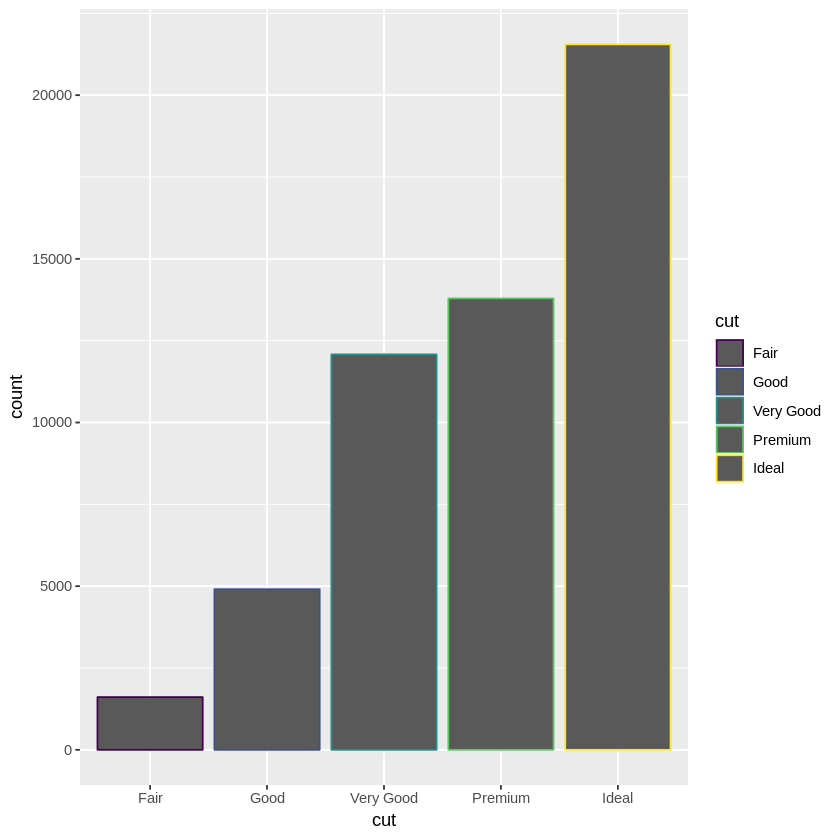

In [66]:
ggplot(data=data) +
    geom_bar(mapping=aes(x=cut, color=cut))

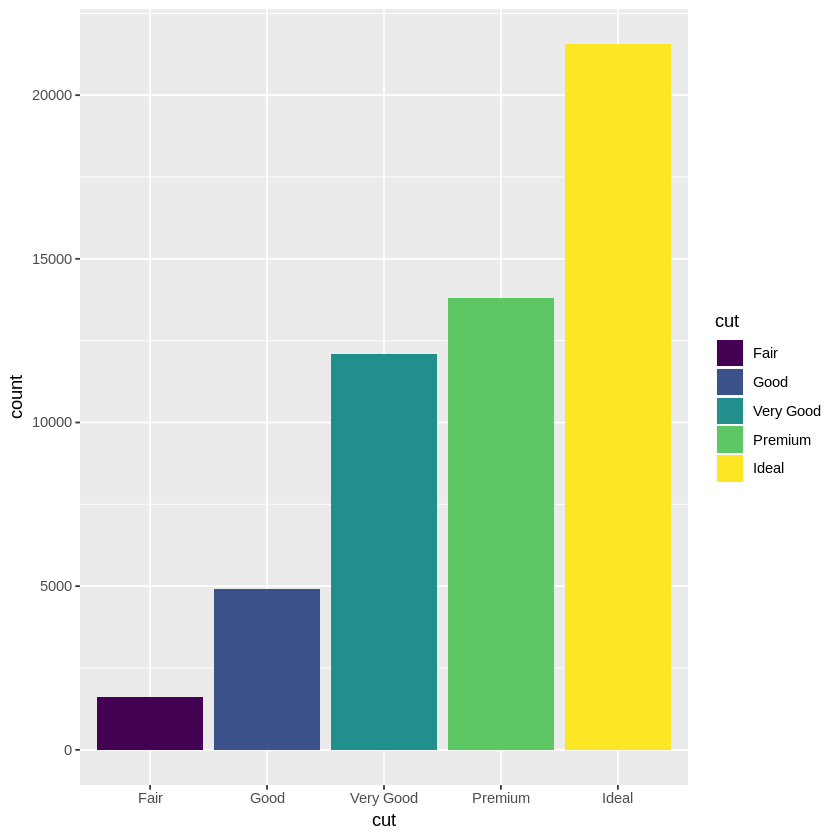

In [67]:
ggplot(data=data) +
    geom_bar(mapping=aes(x=cut, fill=cut))

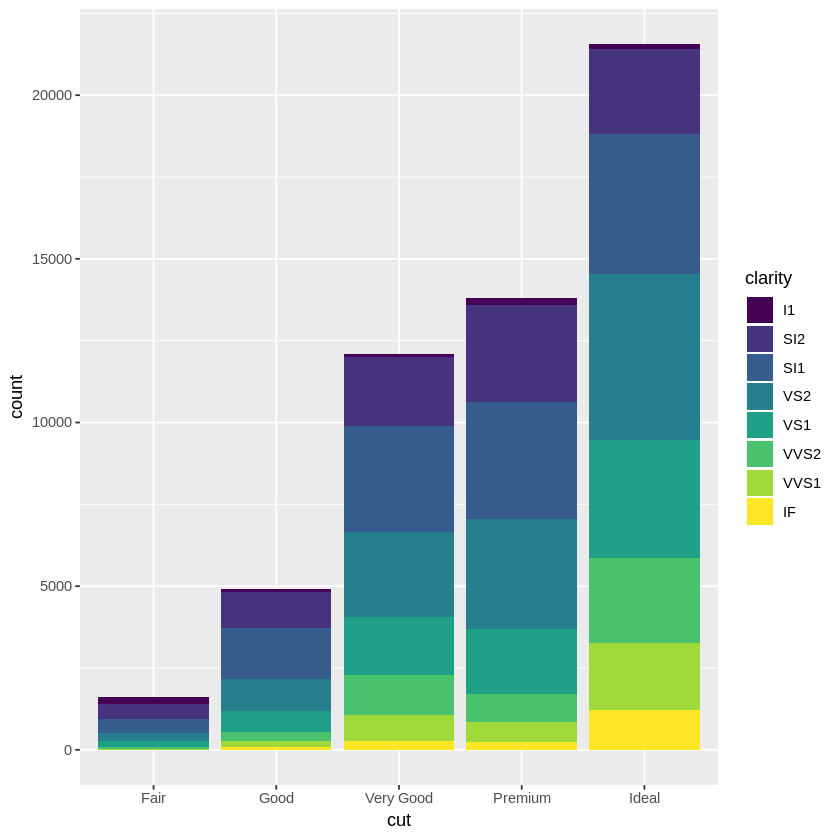

In [68]:
ggplot(data=data) +
    geom_bar(mapping=aes(x=cut, fill=clarity))

In [69]:
data = penguins
head(data)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Warning message:
“Removed 2 rows containing missing values (geom_point).”

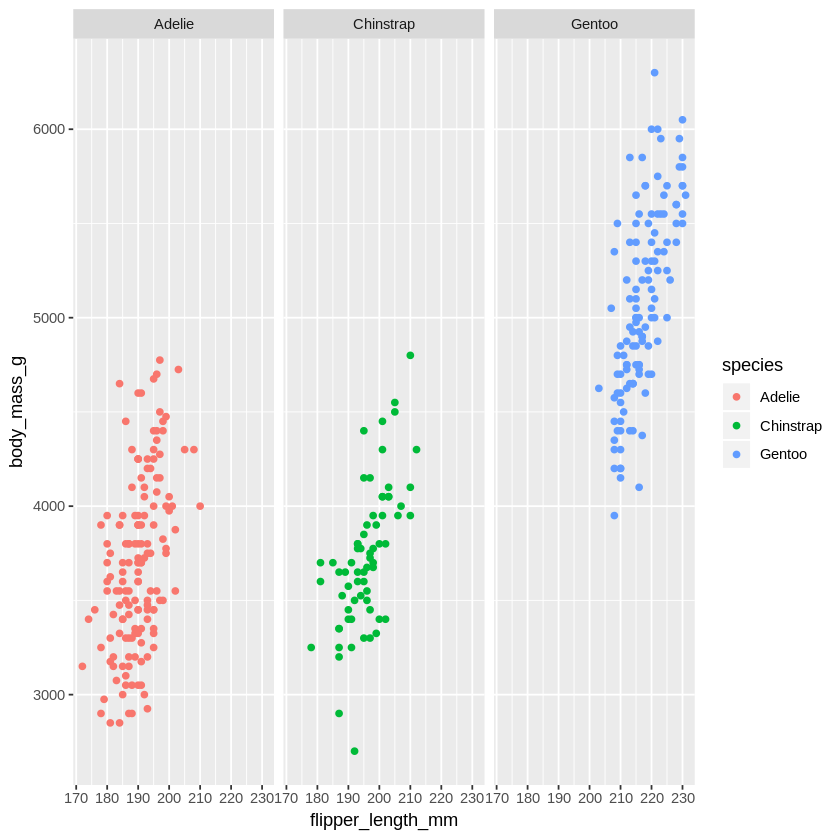

In [70]:
ggplot(data=data, aes(x=flipper_length_mm, y=body_mass_g)) +
    geom_point(aes(color=species)) +
    facet_wrap(~species)

In [76]:
data = diamonds
head(data)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


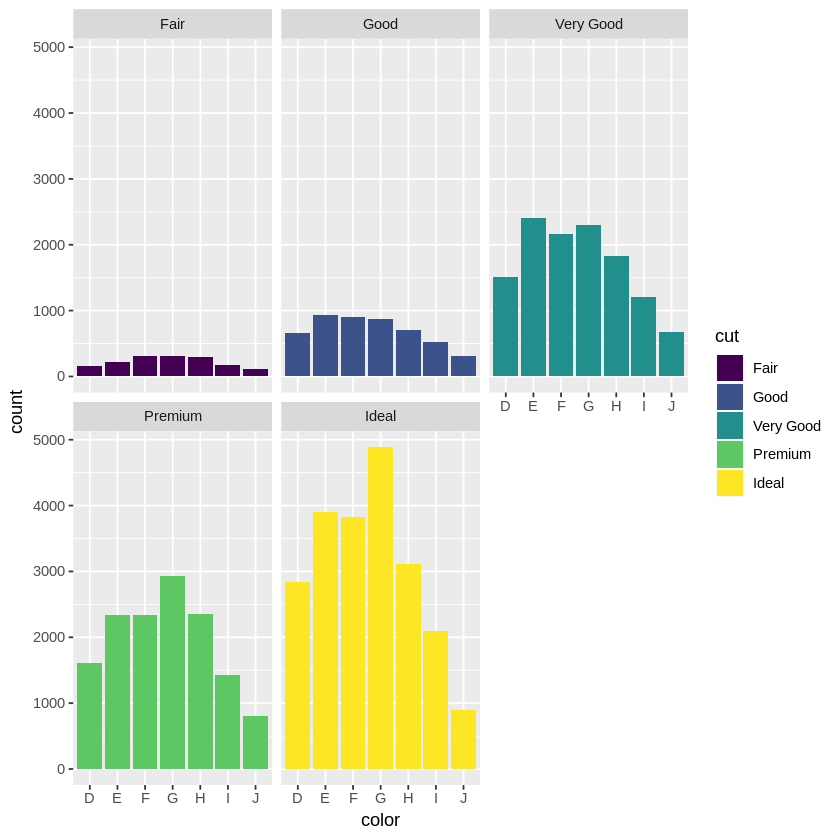

In [75]:
ggplot(data=data) +
    geom_bar(mapping=aes(x=color, fill=cut)) +
    facet_wrap(~cut)

In [3]:
data = penguins
head(data)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Warning message:
“Removed 2 rows containing missing values (geom_point).”

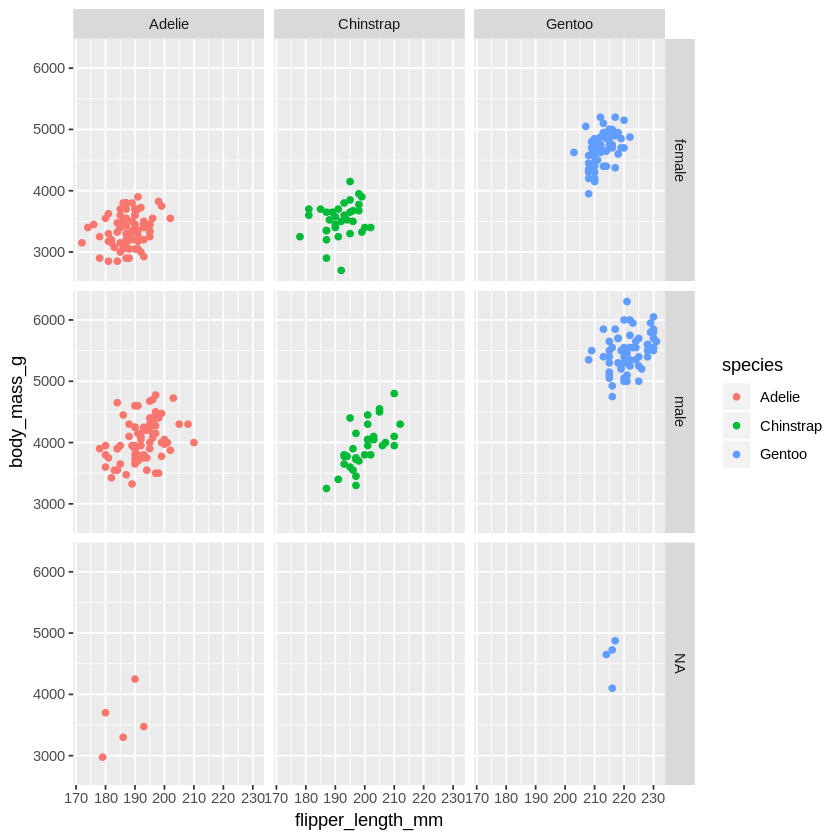

In [4]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    facet_grid(sex~species)

Warning message:
“Removed 2 rows containing missing values (geom_point).”

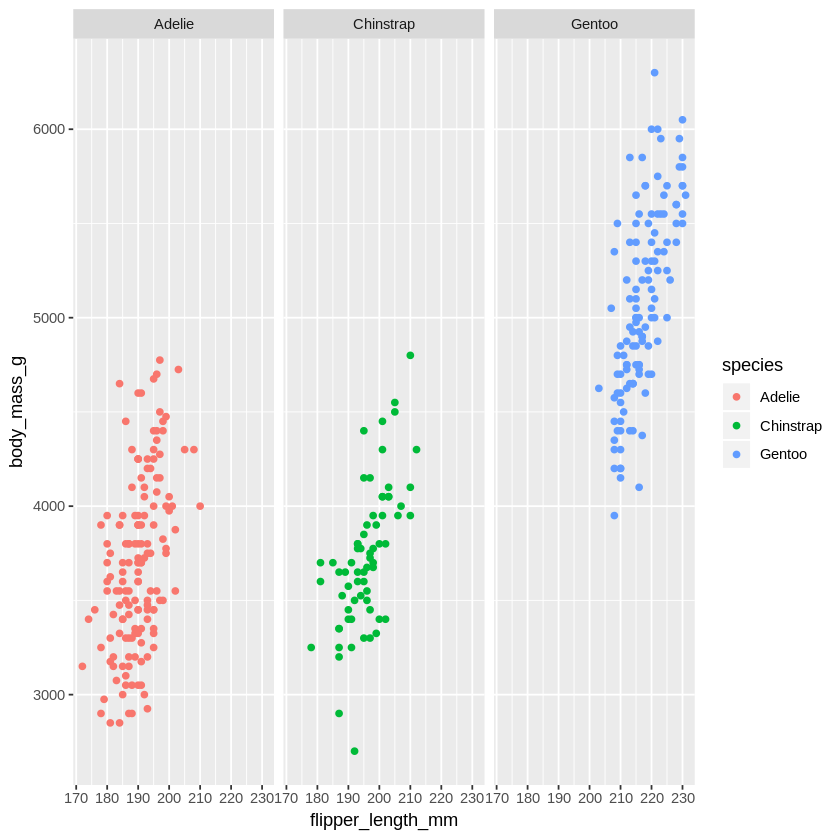

In [5]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    facet_grid(~species)

Warning message:
“Removed 2 rows containing missing values (geom_point).”

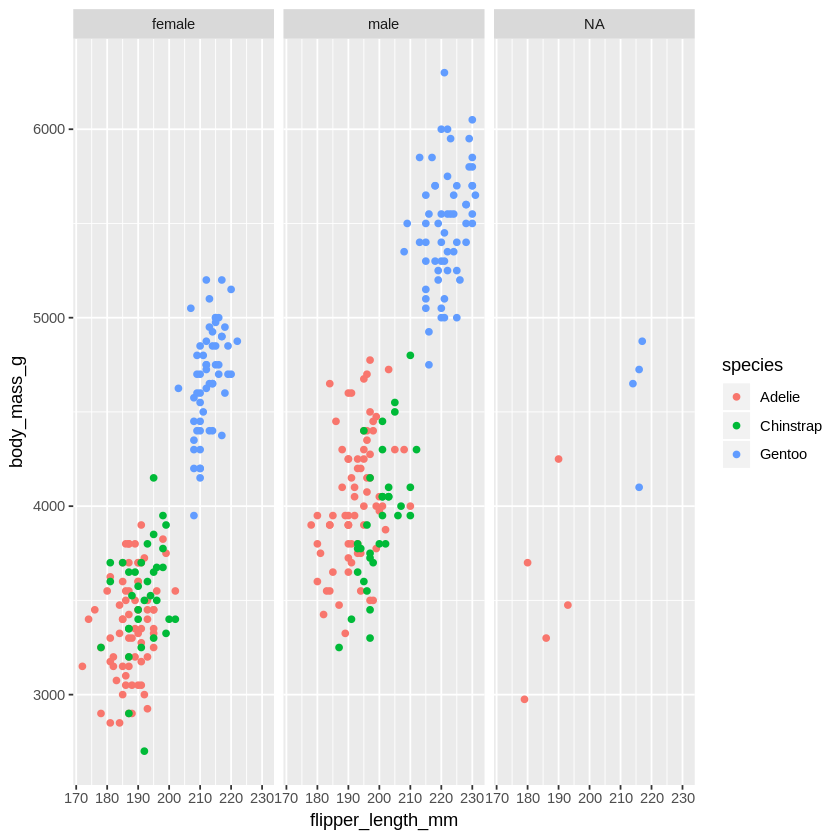

In [6]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    facet_grid(~sex)

Warning message:
“Removed 2 rows containing missing values (geom_point).”

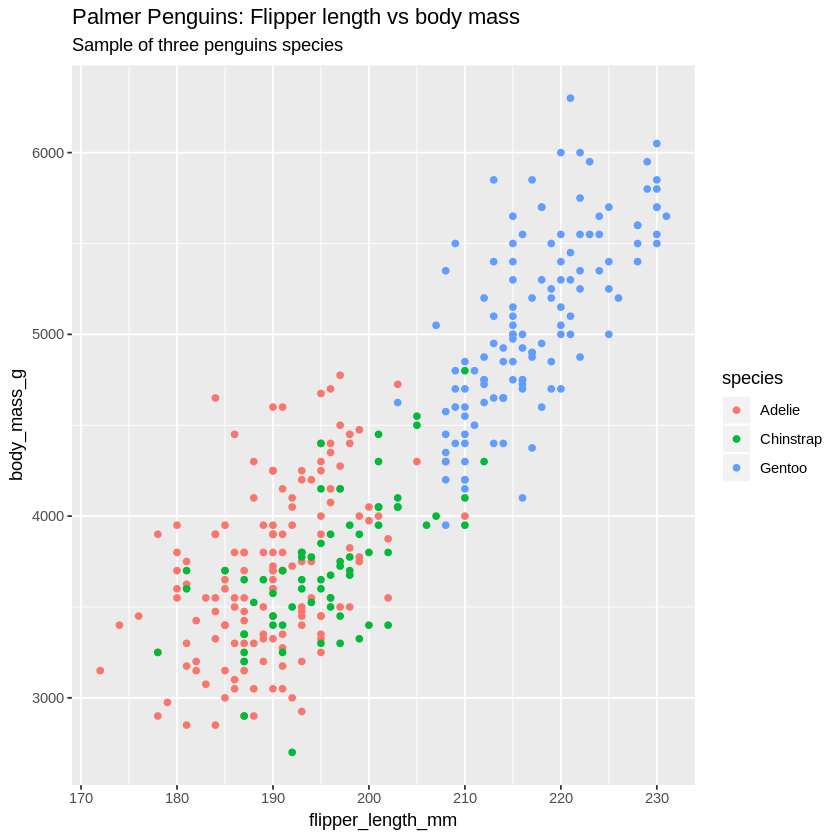

In [11]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    labs(title="Palmer Penguins: Flipper length vs body mass", subtitle="Sample of three penguins species")

Warning message:
“Removed 2 rows containing missing values (geom_point).”

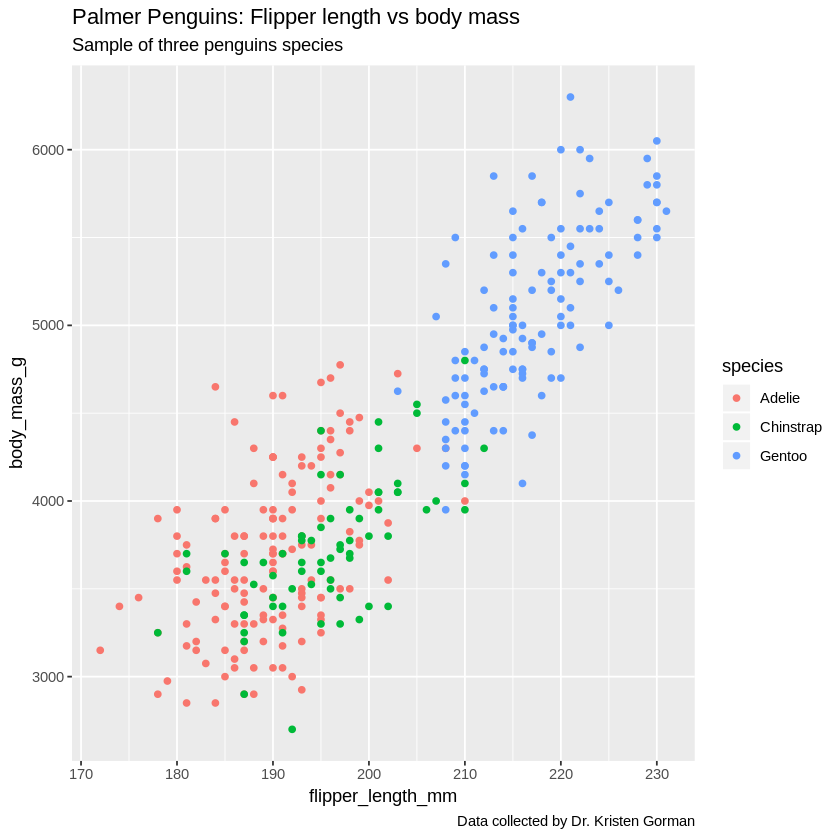

In [13]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    labs(title="Palmer Penguins: Flipper length vs body mass", subtitle="Sample of three penguins species",
         captions="Data collected by Dr. Kristen Gorman")

Warning message:
“Removed 2 rows containing missing values (geom_point).”

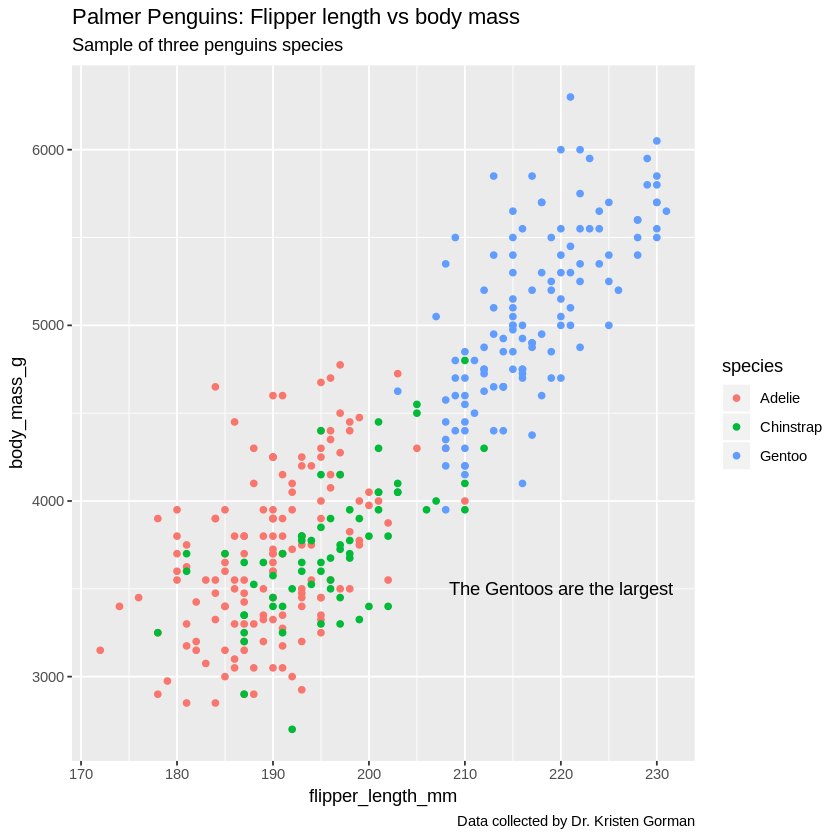

In [15]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    labs(title="Palmer Penguins: Flipper length vs body mass", subtitle="Sample of three penguins species",
         captions="Data collected by Dr. Kristen Gorman") +
    annotate('text', x=220, y=3500, label="The Gentoos are the largest")

Warning message:
“Removed 2 rows containing missing values (geom_point).”

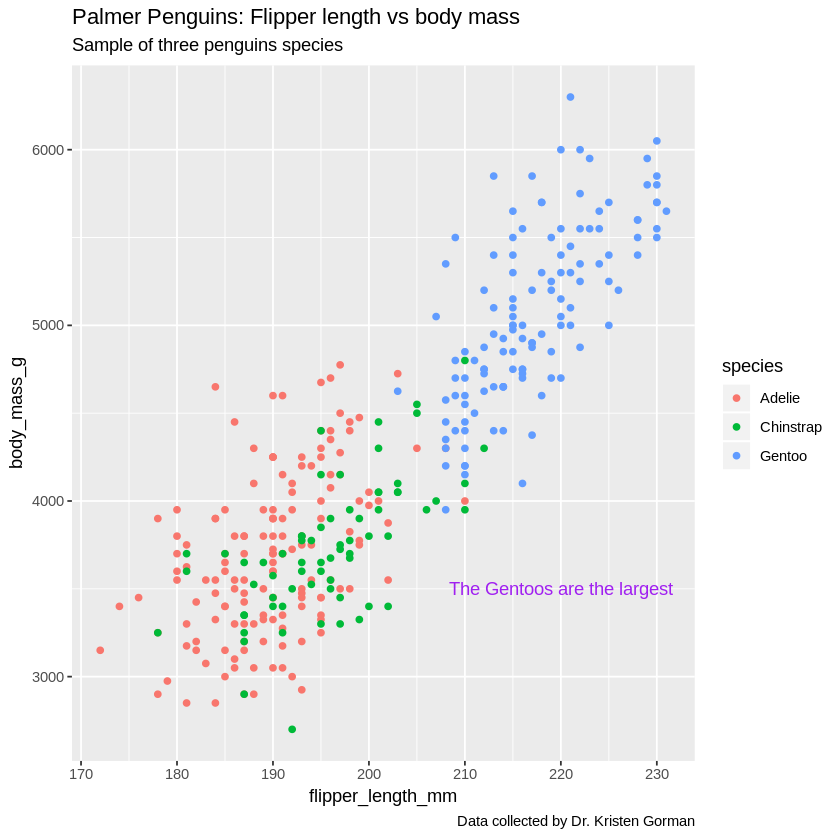

In [16]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    labs(title="Palmer Penguins: Flipper length vs body mass", subtitle="Sample of three penguins species",
         captions="Data collected by Dr. Kristen Gorman") +
    annotate('text', x=220, y=3500, label="The Gentoos are the largest", color='purple')

Warning message:
“Removed 2 rows containing missing values (geom_point).”

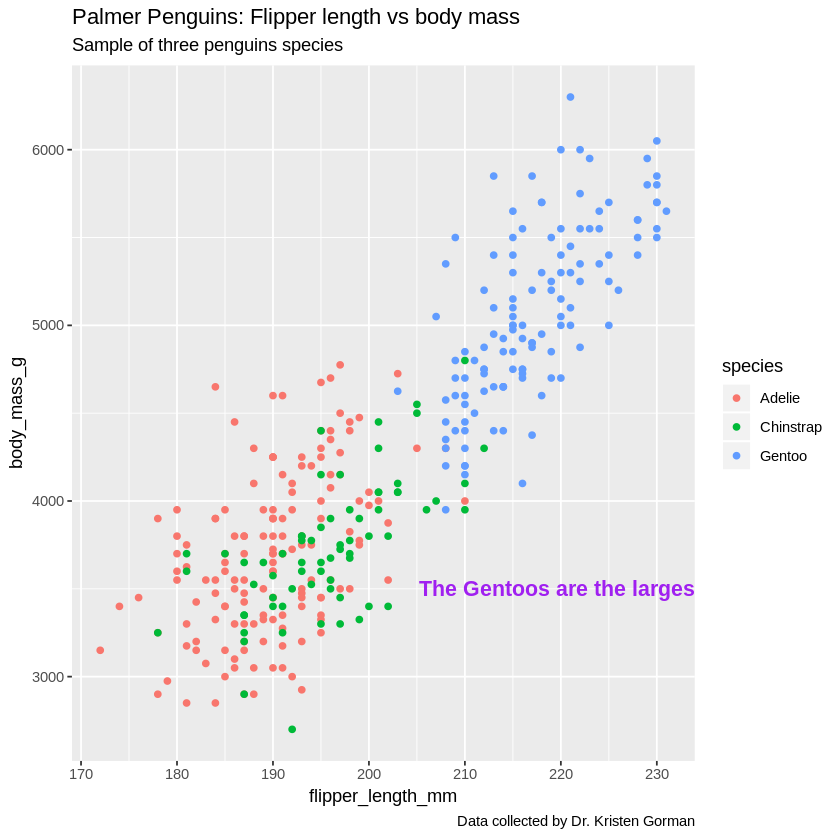

In [17]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    labs(title="Palmer Penguins: Flipper length vs body mass", subtitle="Sample of three penguins species",
         captions="Data collected by Dr. Kristen Gorman") +
    annotate('text', x=220, y=3500, label="The Gentoos are the largest", color='purple',
             fontface='bold', size=4.5)

Warning message:
“Removed 2 rows containing missing values (geom_point).”

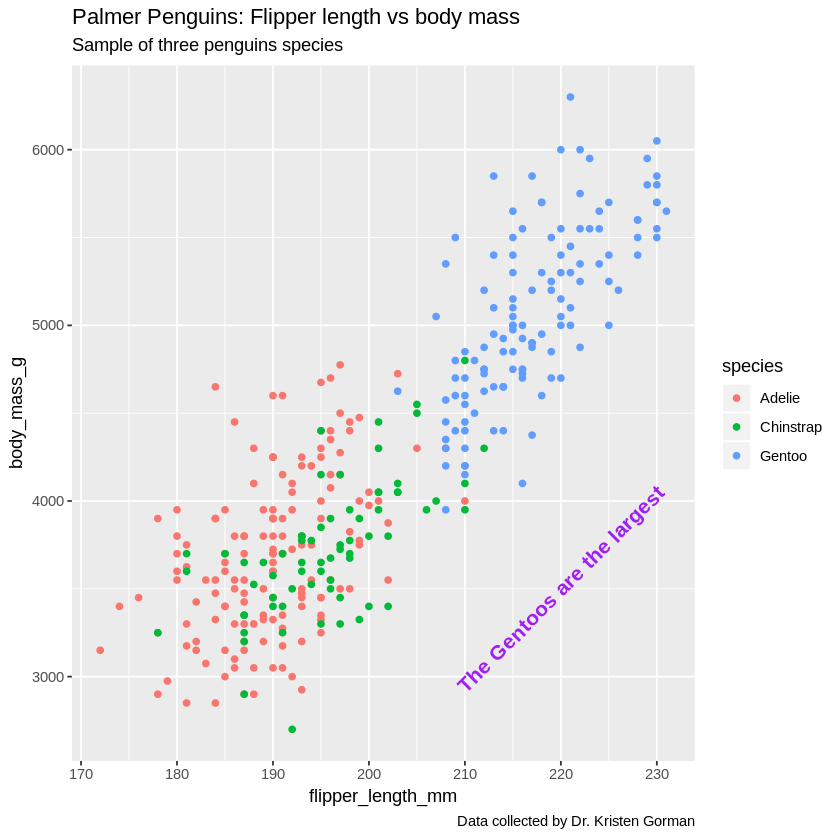

In [18]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    labs(title="Palmer Penguins: Flipper length vs body mass", subtitle="Sample of three penguins species",
         captions="Data collected by Dr. Kristen Gorman") +
    annotate('text', x=220, y=3500, label="The Gentoos are the largest", color='purple',
             fontface='bold', size=4.5, angle=45)

In [20]:
gr <- ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species)) +
    labs(title="Palmer Penguins: Flipper length vs body mass", subtitle="Sample of three penguins species",
         captions="Data collected by Dr. Kristen Gorman")

Warning message:
“Removed 2 rows containing missing values (geom_point).”

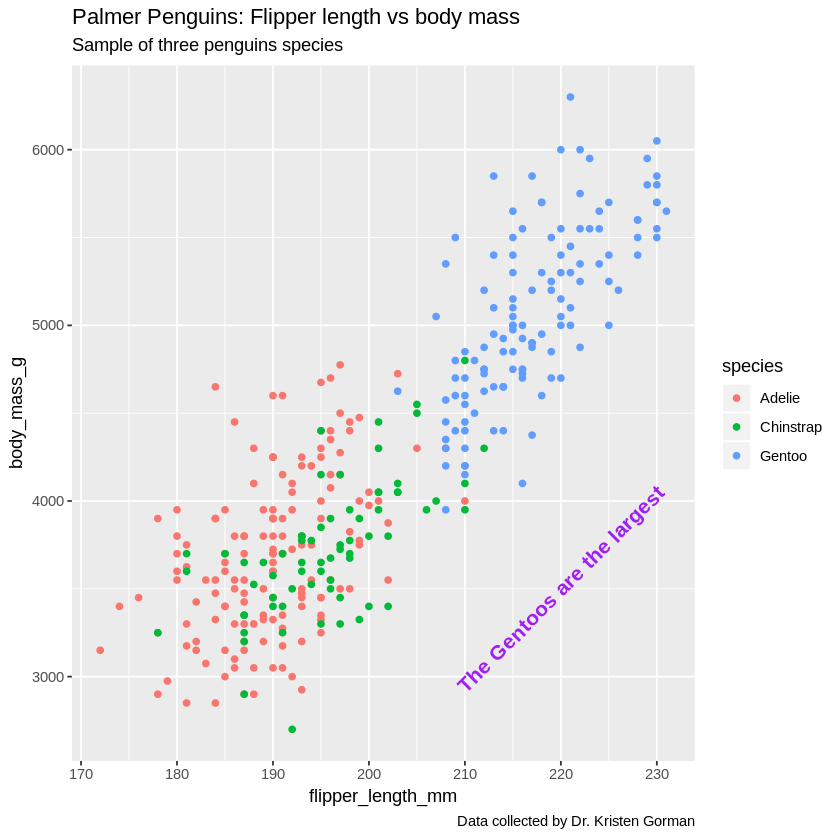

In [21]:
gr + annotate('text', x=220, y=3500, label="The Gentoos are the largest", color='purple',
             fontface='bold', size=4.5, angle=45)

Warning message:
“Removed 2 rows containing missing values (geom_point).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 2 rows containing missing values (geom_point).”

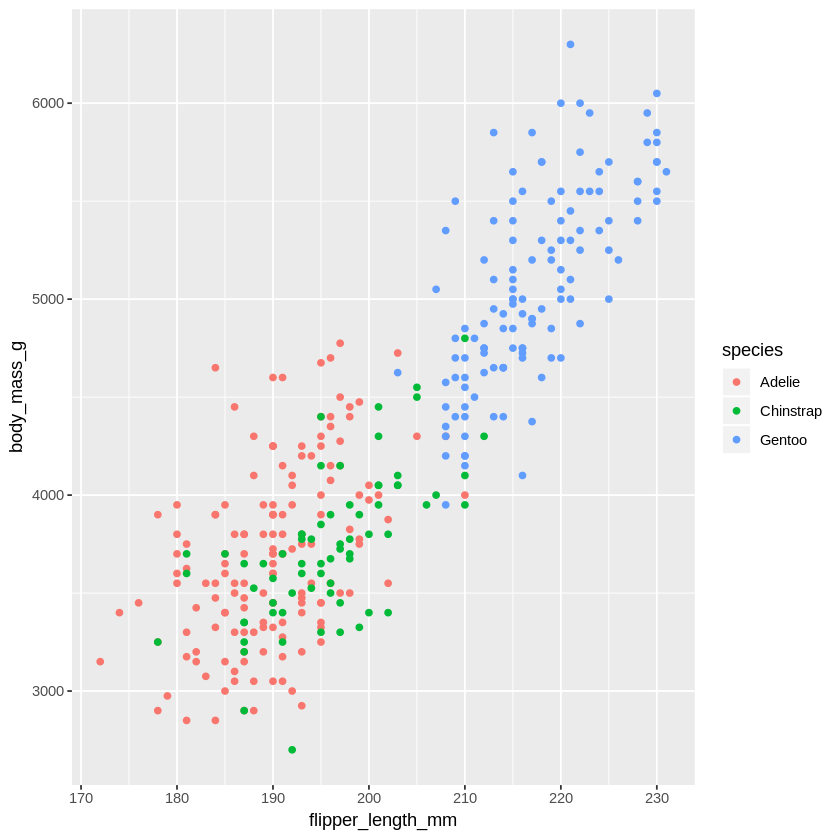

In [24]:
ggplot(data=data) +
    geom_point(mapping=aes(x=flipper_length_mm, y=body_mass_g, color=species))

# Saving images
ggsave("Image_save_test.png")